**Import Library** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

**Load and Preprocess the Dataset**

In [2]:
# Step 1: Load and Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Normalize pixel values**

In [5]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Reshape data to fit the input requirements of a CNN**

In [9]:
# Reshape data to fit the input requirements of a CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**Convert labels to one-hot encoding**

In [11]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Compile the Model**

In [15]:
# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Build the CNN Model**

In [ ]:
# Step 2: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

**Train the Model**

In [17]:
# Step 4: Train the Model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7736 - loss: 0.7148 - val_accuracy: 0.9789 - val_loss: 0.0725
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9684 - loss: 0.1154 - val_accuracy: 0.9772 - val_loss: 0.0683
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9751 - loss: 0.0827 - val_accuracy: 0.9872 - val_loss: 0.0463
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9810 - loss: 0.0595 - val_accuracy: 0.9868 - val_loss: 0.0485
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9890 - val_loss: 0.0394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9901 - val_loss: 0.0366
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9889 - val_loss: 0.0392
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9886 - loss: 0.0359 - val_acc

**Evaluate the Model**

In [18]:
# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 99.19%


**Confusion Matrix**

In [ ]:
# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

**Plot Confusion Matrix**

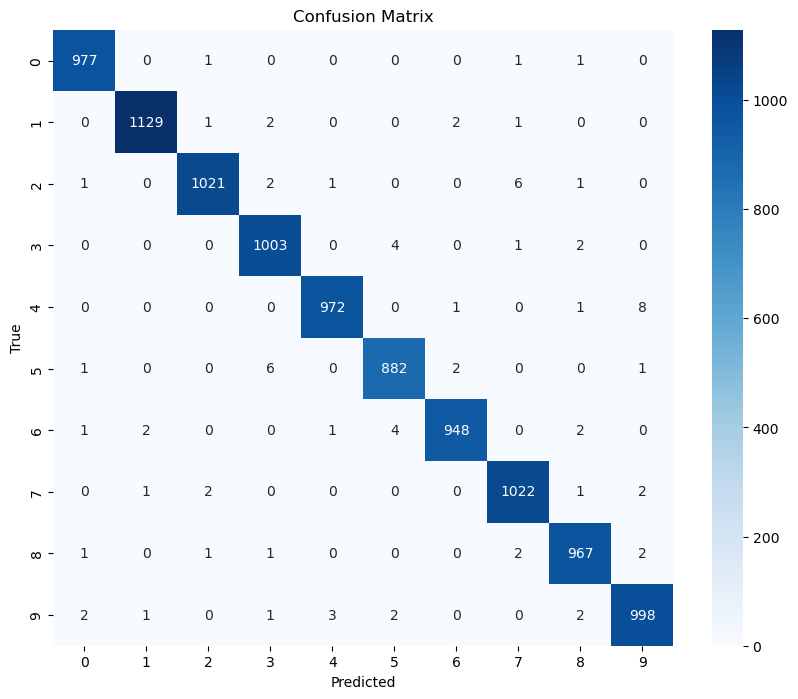

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

In [25]:
# Classification Report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Plot Training History**

In [27]:
# Step 6: Plot Training History
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

**Accuracy Plot**

Text(0.5, 1.0, 'Model Accuracy')

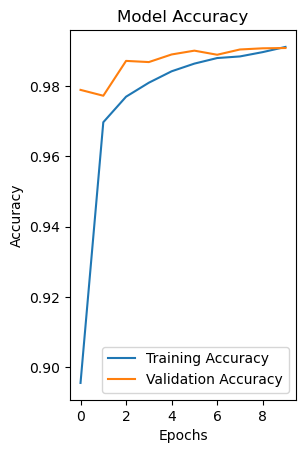

In [29]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

**Loss Plot**

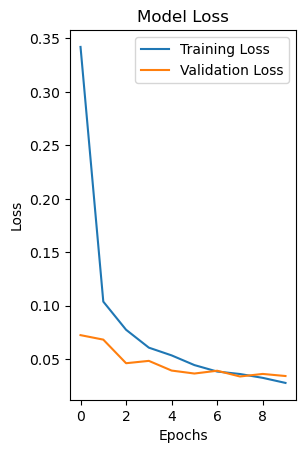

In [31]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

**Save the Model**

In [51]:
# Save the Model
model.save('mnist_cnn_model.h5')